<a href="https://colab.research.google.com/github/ffquindala/Sales_Client_Segmentation/blob/master/Cliente_Segmentation_UsingK_Means.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Connect Google Colab to Drive
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
path = '/content/drive/MyDrive/Colab_Notebooks/DMDM/Client_Sales_Segmentation/'

Mounted at /content/drive


importing libraries


In [ ]:
import warnings
warnings.simplefilter("ignore")

import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np
import missingno as msno
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import MinMaxScaler
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN
from sklearn.cluster import AgglomerativeClustering


In [ ]:
#importing dataset
data = pd.read_csv(path + 'sales_data.csv')
data

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
0,2013-11-26,26,November,2013,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
1,2015-11-26,26,November,2015,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
2,2014-03-23,23,March,2014,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,23,45,120,1366,1035,2401
3,2016-03-23,23,March,2016,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,20,45,120,1188,900,2088
4,2014-05-15,15,May,2014,47,Adults (35-64),F,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,4,45,120,238,180,418
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113031,2016-04-12,12,April,2016,41,Adults (35-64),M,United Kingdom,England,Clothing,Vests,"Classic Vest, S",3,24,64,112,72,184
113032,2014-04-02,2,April,2014,18,Youth (<25),M,Australia,Queensland,Clothing,Vests,"Classic Vest, M",22,24,64,655,528,1183
113033,2016-04-02,2,April,2016,18,Youth (<25),M,Australia,Queensland,Clothing,Vests,"Classic Vest, M",22,24,64,655,528,1183
113034,2014-03-04,4,March,2014,37,Adults (35-64),F,France,Seine (Paris),Clothing,Vests,"Classic Vest, L",24,24,64,684,576,1260


#Data Preparation



Data Cleaning

In [ ]:
#using duplicated method to checkl duplicated rows in the dataset
data[data.duplicated(keep=False)]

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
1020,2013-12-19,19,December,2013,22,Youth (<25),M,Australia,New South Wales,Accessories,Bike Stands,All-Purpose Bike Stand,9,59,159,714,531,1245
1021,2013-12-19,19,December,2013,22,Youth (<25),M,Australia,New South Wales,Accessories,Bike Stands,All-Purpose Bike Stand,9,59,159,714,531,1245
1090,2015-09-30,30,September,2015,42,Adults (35-64),F,Australia,Victoria,Accessories,Bottles and Cages,Mountain Bottle Cage,5,4,10,20,20,40
1091,2015-09-30,30,September,2015,42,Adults (35-64),F,Australia,Victoria,Accessories,Bottles and Cages,Mountain Bottle Cage,5,4,10,20,20,40
1092,2013-10-24,24,October,2013,42,Adults (35-64),F,Australia,Victoria,Accessories,Bottles and Cages,Mountain Bottle Cage,2,4,10,8,8,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111265,2014-04-27,27,April,2014,31,Young Adults (25-34),M,United States,Washington,Bikes,Touring Bikes,"Touring-1000 Blue, 50",1,1482,2384,378,1482,1860
111952,2013-09-20,20,September,2013,42,Adults (35-64),M,Canada,British Columbia,Bikes,Touring Bikes,"Touring-3000 Yellow, 44",1,461,742,274,461,735
111953,2013-09-20,20,September,2013,42,Adults (35-64),M,Canada,British Columbia,Bikes,Touring Bikes,"Touring-3000 Yellow, 44",1,461,742,274,461,735
111954,2015-09-20,20,September,2015,42,Adults (35-64),M,Canada,British Columbia,Bikes,Touring Bikes,"Touring-3000 Yellow, 44",1,461,742,274,461,735


In [ ]:
#Deleting duplicated data
data.drop_duplicates(inplace=True)



In [ ]:
data[data.duplicated(keep=False)]

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue


Correlation 

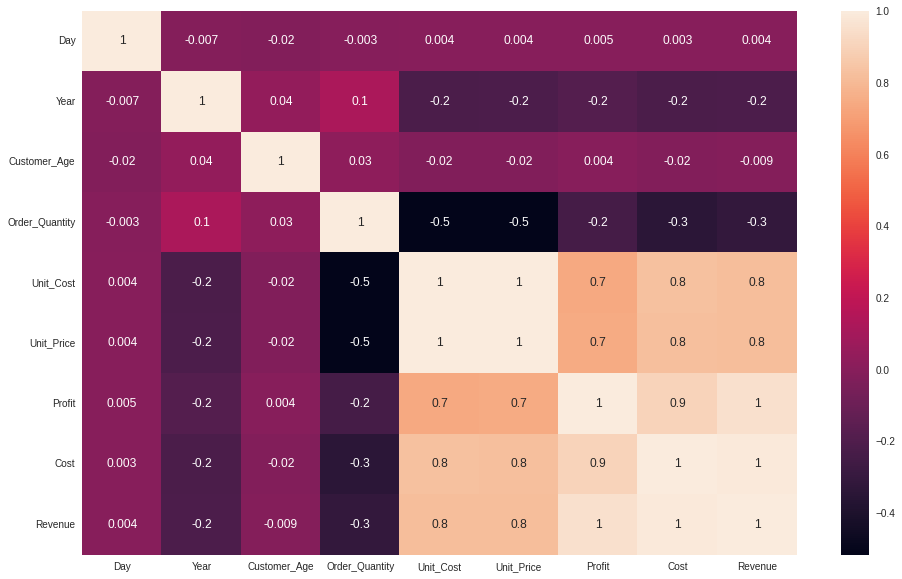

In [ ]:

data_corr = data.copy()
corr = data_corr.corr()
figure = plt.figure(figsize=(16,10))
sns.heatmap(data = corr, annot=True, fmt = '.1g')

In [ ]:
from pandas.core.describe import describe_categorical_1d
#copyOriginalDaset
client_anal = data[['Age_Group','Unit_Price','Profit', 'Revenue']].copy()
client_anal

,Age_Group,Unit_Price,Profit,Revenue
0,Youth (<25),120,590,950
1,Youth (<25),120,590,950
2,Adults (35-64),120,1366,2401
3,Adults (35-64),120,1188,2088
4,Adults (35-64),120,238,418
...,...,...,...,...
113031,Adults (35-64),64,112,184
113032,Youth (<25),64,655,1183
113033,Youth (<25),64,655,1183
113034,Adults (35-64),64,684,1260


Checkinh missing values


In [ ]:
client_anal.isna().sum()

Age_Group     0
Unit_Price    0
Profit        0
Revenue       0
dtype: int64

Cheking outliers


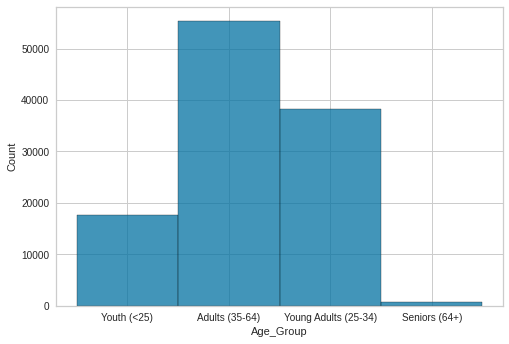

In [ ]:
sns.histplot(data=client_anal, x='Age_Group')

In [ ]:
#DummyVariables
cat_data = client_anal[['Age_Group']].copy()
cat_data.head()

,Age_Group
0,Youth (<25)
1,Youth (<25)
2,Adults (35-64)
3,Adults (35-64)
4,Adults (35-64)


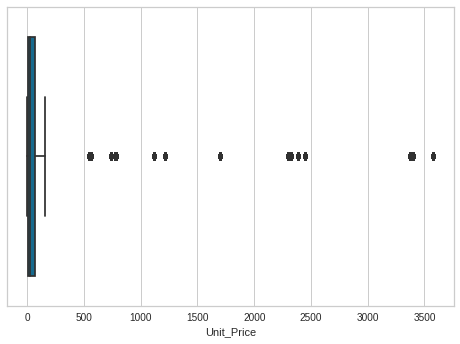

In [ ]:
# checking outliers for each value
sns.boxplot(x='Unit_Price', data = client_anal)

In [ ]:
client_anal['Unit_Price'].describe()

count    112036.000000
mean        453.850628
std         922.751848
min           2.000000
25%           5.000000
50%          25.000000
75%          70.000000
max        3578.000000
Name: Unit_Price, dtype: float64

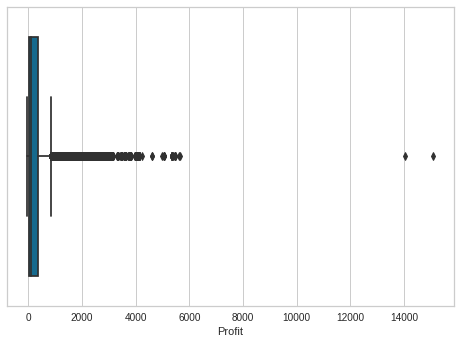

In [ ]:
sns.boxplot(x='Profit', data = client_anal)

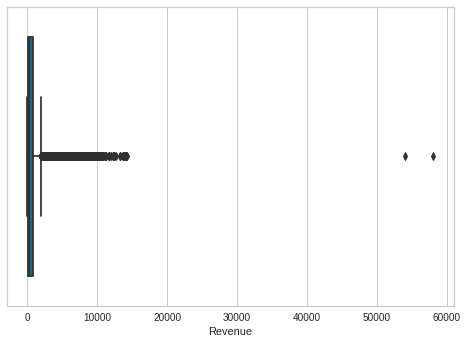

In [ ]:
sns.boxplot(x='Revenue', data = client_anal)

In [ ]:
client_anal.shape


(112036, 4)

Feature Engineering

Data Transformation


In [ ]:
finaldata =   client_anal[client_anal['Unit_Price'] < 500]

In [ ]:
finaldata =   client_anal[client_anal['Profit'] < 4000]

In [ ]:
finaldata =   client_anal[client_anal['Revenue'] < 10000]

In [ ]:
finaldata.drop(labels = ['Age_Group'], axis = 1, inplace = True)
finaldata.head()

,Unit_Price,Profit,Revenue
0,120,590,950
1,120,590,950
2,120,1366,2401
3,120,1188,2088
4,120,238,418


Create an instance of MinMaxScal minmax_scaller

In [ ]:
minmax_scaler = MinMaxScaler()


In [ ]:
scale = minmax_scaler.fit(finaldata)
minmax_data = scale.transform(finaldata)
minmax_data = pd.DataFrame(minmax_data, columns = finaldata.columns)
#dbscan_clust = minmax_data
minmax_data.head()

,Unit_Price,Profit,Revenue
0,0.032998,0.145574,0.094980
1,0.032998,0.145574,0.094980
2,0.032998,0.327776,0.240357
3,0.032998,0.285983,0.208997
4,0.032998,0.062926,0.041679


Applying K-Means

Selecting the numbers of clusters

In [ ]:
ks = range(1, 10)
inertias =[]
for k in ks:
  #create a KMeans instance with K clusters: model
  model = KMeans(n_clusters=k)
  #fit model to samples
  model.fit(minmax_data)
  #Append the inertia to the list of inertias
  inertias.append(model.inertia_)



 Plot the inertia to see which number of clusters is best by using the elbow method.

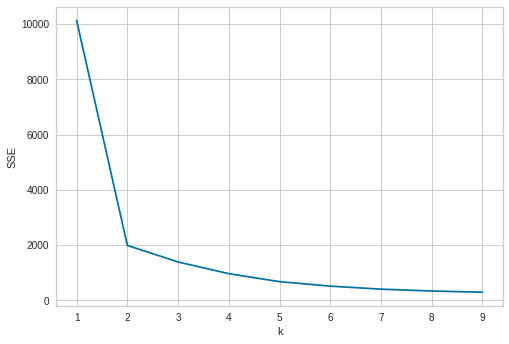

In [ ]:
# Plot ks (x-axis) vs inertias (y-axis) using plt.plot(). 
plt.plot(ks, inertias)

# define the label for x axis as 'k' using matplotlib.pyplot.xlabel
plt.xlabel('k')
# define the label for y axis as 'SSE' using matplotlib.pyplot.ylabel
plt.ylabel('SSE')
# define the ticks in x axis using the values of ks
plt.xticks(ks)
# call plt.show()
plt.show()

from the graph that 2 seems to be a good number of clusters, since this is the point where the inertia (or the sum squared of errors) begins to decrease more slowly.

sing KMeans(), create a KMeans instance called model to find 2 clusters. To specify the number of clusters, use the n_clusters keyword argument.

In [ ]:
model = KMeans(n_clusters=2)
#Use the .fit() method of model to fit the model 
model.fit(minmax_data)
#Create a new column in the dataframe named label, which will store the cluster number that each observation belongs to. 
#To obtain those values, you need to call the attribute .labels_ in the model
minmax_data['labels'] = model.labels_
minmax_data

,Unit_Price,Profit,Revenue,labels
0,0.032998,0.145574,0.094980,0
1,0.032998,0.145574,0.094980,0
2,0.032998,0.327776,0.240357,0
3,0.032998,0.285983,0.208997,0
4,0.032998,0.062926,0.041679,0
...,...,...,...,...
111862,0.017338,0.033341,0.018235,0
111863,0.017338,0.160836,0.118325,0
111864,0.017338,0.160836,0.118325,0
111865,0.017338,0.167645,0.126039,0


Exploring the Results

In [ ]:
descr = minmax_data.reset_index(drop=True)
descr = descr.groupby(['labels']).describe().transpose()
descr

labels                       0             1
Unit_Price count  95733.000000  16134.000000
           mean       0.026530      0.709600
           std        0.067752      0.167129
           min        0.000000      0.312640
           25%        0.000839      0.641219
           50%        0.005313      0.666107
           75%        0.009228      0.682606
           max        0.339206      1.000000
Profit     count  95733.000000  16134.000000
           mean       0.042427      0.253172
           std        0.043565      0.141568
           min        0.000000      0.056351
           25%        0.012444      0.156375
           50%        0.023480      0.215544
           75%        0.060812      0.302888
           max        0.526884      1.000000
Revenue    count  95733.000000  16134.000000
           mean       0.033527      0.313857
           std        0.040724      0.164217
           min        0.000000      0.129346
           25%        0.005010      0.201984
           50%        0.014027      0.233844
           75%        0.052299      0.362389
           max        0.356878      1.000000

Visualizing the Results

Create a different dataframe that will be composed by the individuals of each cluster, i.e., cluster0 will be composed by the individuals of cluster 0 only, and the same logic applies for cluster1.

In [ ]:
cluster0 = minmax_data[minmax_data.labels==0]
cluster1 = minmax_data[minmax_data.labels==1]

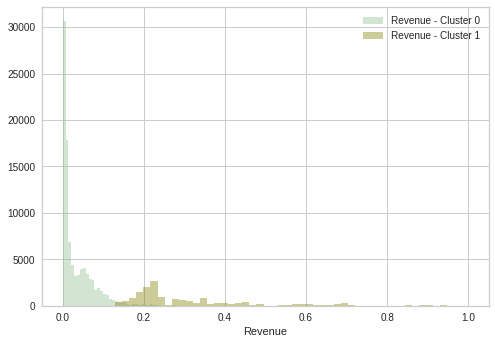

In [ ]:
sns.distplot(cluster0['Revenue'],color='darkseagreen',label='Revenue - Cluster 0', kde = False)
sns.distplot(cluster1['Revenue'],color='olive',label='Revenue - Cluster 1', kde = False)
plt.legend()

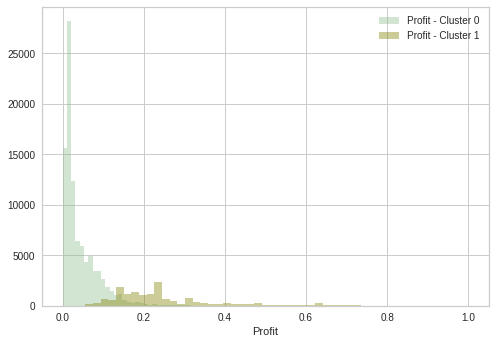

In [ ]:
sns.distplot(cluster0['Profit'],color='darkseagreen',label='Profit - Cluster 0', kde = False)
sns.distplot(cluster1['Profit'],color='olive',label='Profit - Cluster 1', kde = False)
plt.legend()

We can see that if we want segment our clients the cluster 0 has more impact than the cluster 1 in this company, we can aply any benefit for those clusters members 